# ANN Bank Customer Churn Prediction

Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

- RowNumber — corresponds to the record (row) number and has no effect on the output.
- CustomerId — contains random values and has no effect on customer leaving the bank.
- Surname — the surname of a customer has no impact on their decision to leave the bank.
- CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography — a customer’s location can affect their decision to leave the bank.
- Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts — refers to the number of products that a customer has purchased through the bank.
- HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember — active customers are less likely to leave the bank.
- EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited — whether or not the customer left the bank.
- Complain — customer has complaint or not.
- Satisfaction Score — Score provided by the customer for their complaint resolution.
- Card Type — type of card hold by the customer.
- Points Earned — the points earned by the customer for using credit card.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df0 = pd.read_csv('./Customer-Churn-Records.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

---

## Data Preprocessing

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns.tolist()

['rownumber',
 'customerid',
 'surname',
 'creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited',
 'complain',
 'satisfaction score',
 'card type',
 'point earned']

In [7]:
cols_to_rename = {
    'rownumber':'row_num',
    'customerid':'customer_id',
    'creditscore':'credit_score',
    'geography':'country',
    'numofproducts':'num_of_products',
    'hascrcard':'has_credit_card',
    'isactivemember':'is_active',
    'estimatedsalary':'estimated_salary',
    'complain':'complained',
    'satisfaction score':'satisfaction_score',
    'card type':'card_type',
    'point earned':'points_earned'
}

In [8]:
df = df.rename(columns=cols_to_rename)

In [9]:
df.columns.tolist()

['row_num',
 'customer_id',
 'surname',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active',
 'estimated_salary',
 'exited',
 'complained',
 'satisfaction_score',
 'card_type',
 'points_earned']

In [10]:
df['exited'] = df.pop('exited')

In [11]:
df

,row_num,customer_id,surname,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [12]:
df.isna().sum()

# No Missing Values

row_num               0
customer_id           0
surname               0
credit_score          0
country               0
gender                0
age                   0
tenure                0
balance               0
num_of_products       0
has_credit_card       0
is_active             0
estimated_salary      0
complained            0
satisfaction_score    0
card_type             0
points_earned         0
exited                0
dtype: int64

In [13]:
df.duplicated().sum()

# No Duplicates

np.int64(0)

---

## EDA

In [18]:
df.columns.tolist()

['row_num',
 'customer_id',
 'surname',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active',
 'estimated_salary',
 'complained',
 'satisfaction_score',
 'card_type',
 'points_earned',
 'exited']

---

# exited - Target Variable

In [19]:
df['exited'].value_counts()

exited
0    7962
1    2038
Name: count, dtype: int64

In [20]:
# Map labels to Data for EDA

label_mapping = {
    0: 'Retained', 
    1: 'Exited'    
}
df['exited'] = df['exited'].replace(label_mapping)

df.head()

,row_num,customer_id,surname,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,Retained
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,Retained
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,Retained


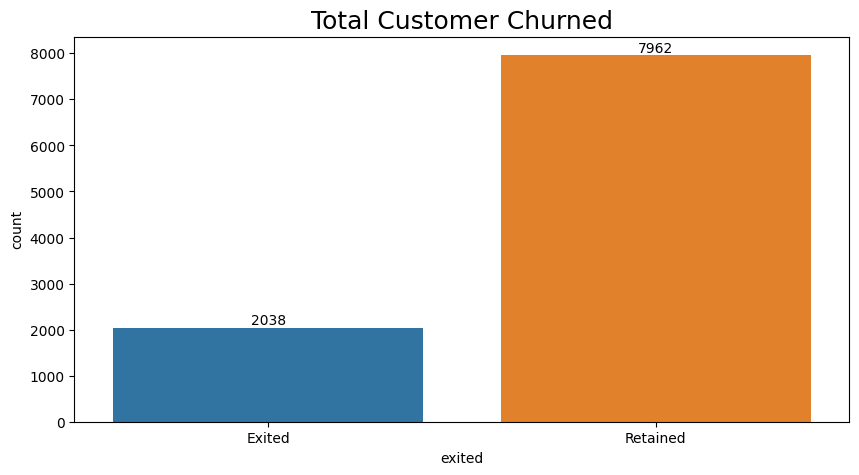

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=df,
    x="exited",
    hue='exited'
)

ax.set_title("Total Customer Churned", fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

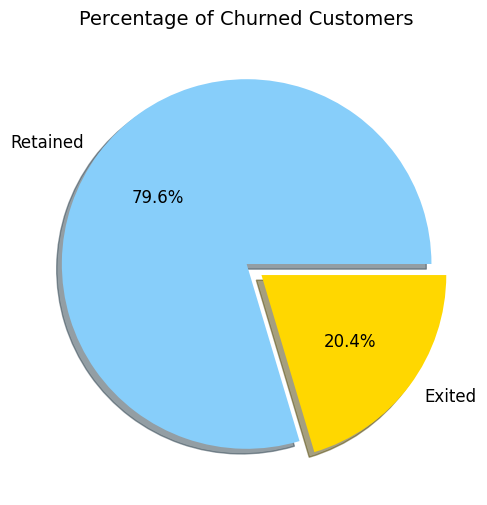

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.exited.value_counts().values,
       labels=df.exited.value_counts().index,
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )

plt.title("Percentage of Churned Customers", fontdict = {'fontsize': 14})

plt.show()

---

# row_num 

`row_num` plays no role in the prediction and therefore needs to be removed.

In [23]:
df = df.drop('row_num',axis=1)

In [24]:
df.columns

Index(['customer_id', 'surname', 'credit_score', 'country', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_credit_card', 'is_active',
       'estimated_salary', 'complained', 'satisfaction_score', 'card_type',
       'points_earned', 'exited'],
      dtype='object')

# customer_id

`customer_id` plays no role in the prediction and therefore needs to be removed.

In [25]:
df = df.drop('customer_id',axis=1)

In [26]:
df.columns

Index(['surname', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_credit_card', 'is_active',
       'estimated_salary', 'complained', 'satisfaction_score', 'card_type',
       'points_earned', 'exited'],
      dtype='object')

# surname

`surname` plays no role in the prediction and therefore needs to be removed.

In [27]:
surname_count_top50 = df['surname'].value_counts().head(50).sort_values(ascending=True)

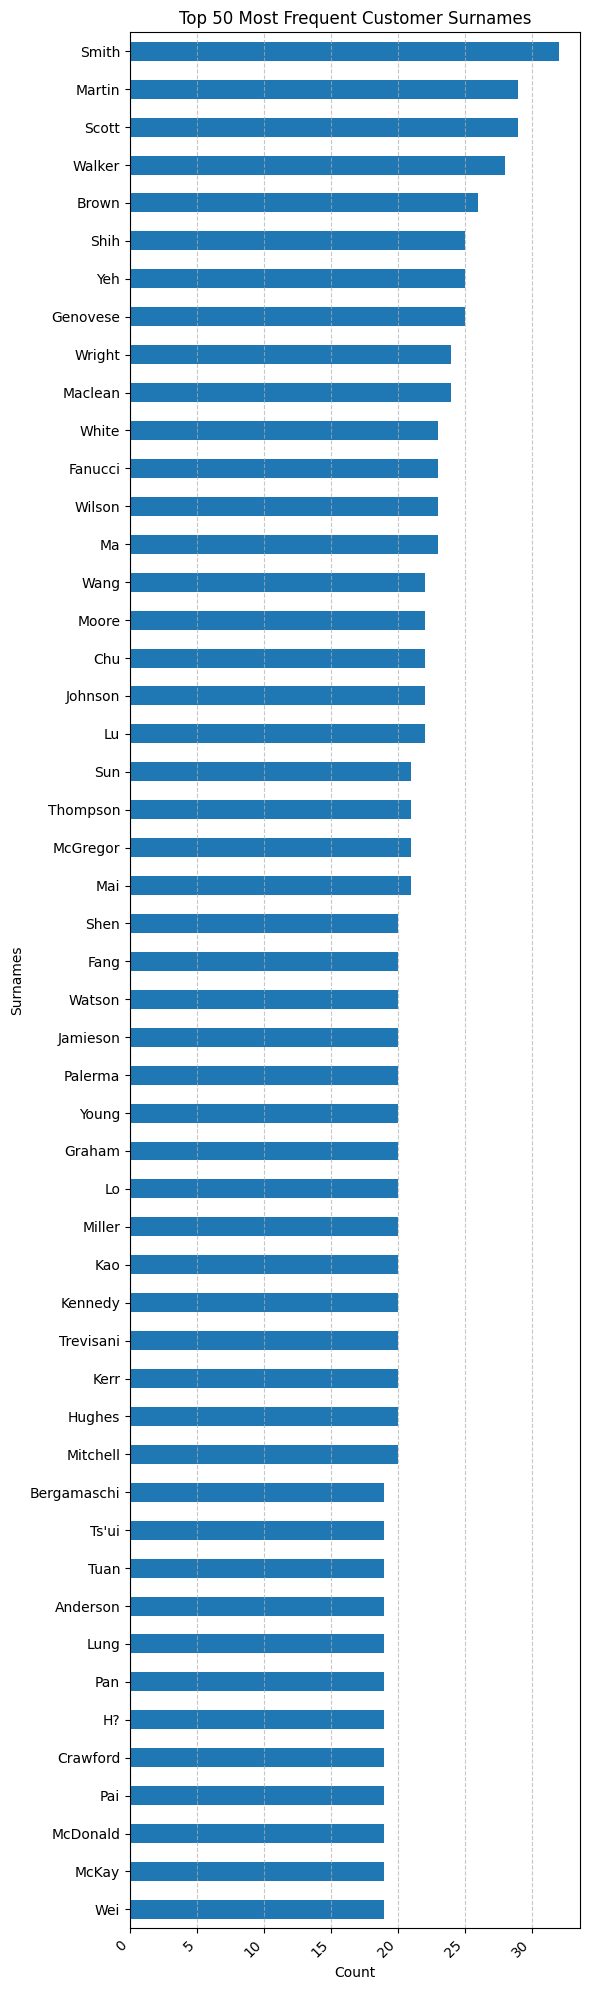

In [28]:
plt.figure(figsize=(6,20))
surname_count_top50.plot(kind='barh')

plt.title('Top 50 Most Frequent Customer Surnames')
plt.xlabel('Count')
plt.ylabel('Surnames')

plt.xticks(rotation=45,ha='right')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()

plt.show()

In [29]:
df = df.drop('surname',axis=1)

In [30]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active', 'estimated_salary',
       'complained', 'satisfaction_score', 'card_type', 'points_earned',
       'exited'],
      dtype='object')

# credit_score

In [89]:
df['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

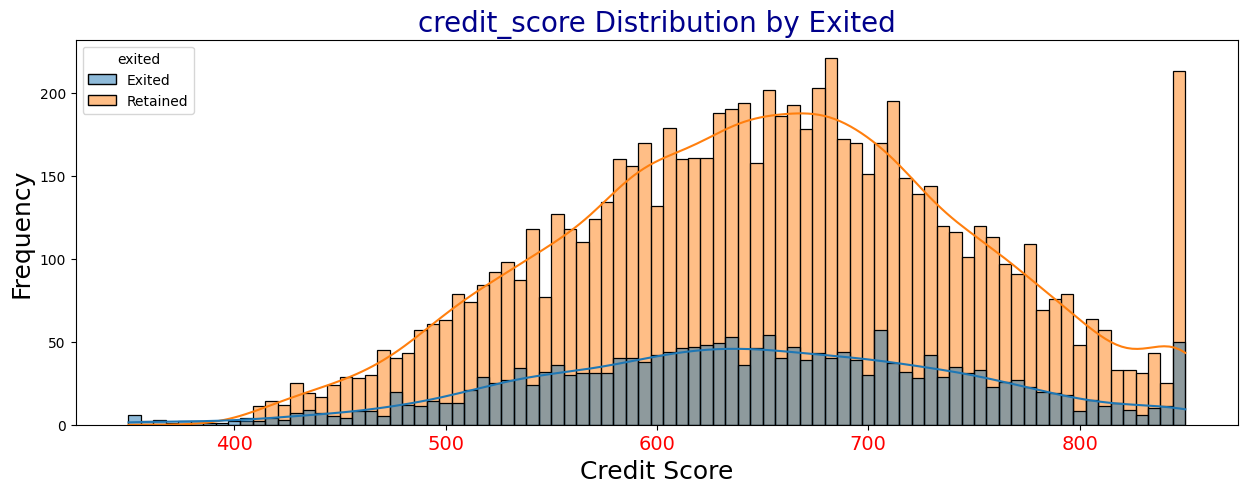

In [32]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="credit_score",
             bins=85,
             kde=True,
             hue="exited")

plt.title("credit_score Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Credit Score", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

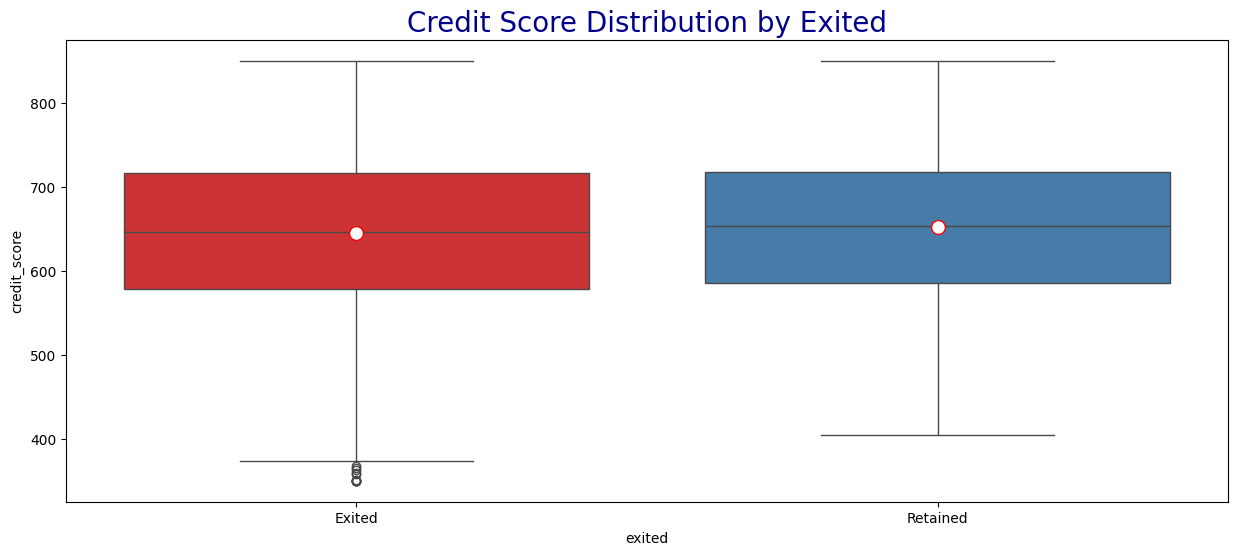

In [34]:
plt.figure(figsize=(15,6))

sns.boxplot(
    data=df,
    x="exited", # Use the categorical variable 'exited' here
    y="credit_score", # Use the numerical variable 'credit_score' here
    showmeans=True,
    meanprops={"marker":"o",
                "markerfacecolor":"white",
                "markeredgecolor":"red",
                "markersize":"10"},
    palette='Set1',
    hue='exited'
)

plt.title("Credit Score Distribution by Exited", fontsize=20, color="darkblue");

In [35]:
df.groupby("exited").credit_score.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,645.414622,100.337351,350.0,578.0,646.0,716.0,850.0
Retained,7962.0,651.837855,95.650047,405.0,585.0,653.0,718.0,850.0


`credit_score` seems to play little role in the prediction.

### 

# country

In [36]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [157]:
df.groupby('country').exited.value_counts()

country  exited  
France   Retained    4203
         Exited       811
Germany  Retained    1695
         Exited       814
Spain    Retained    2064
         Exited       413
Name: count, dtype: int64

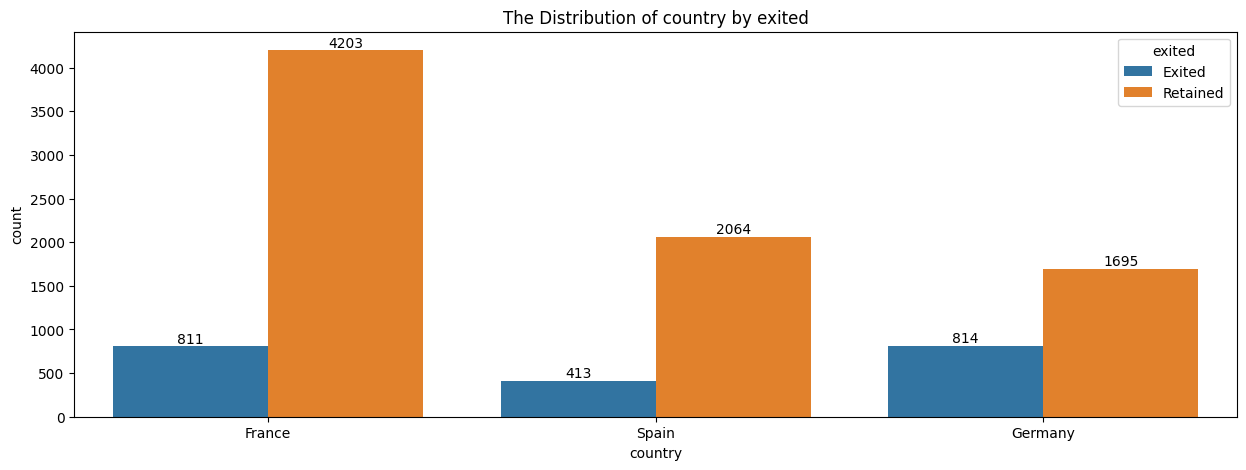

In [38]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data=df,x='country',hue='exited')

plt.title('The Distribution of country by exited')

for container in ax.containers:
    ax.bar_label(container)

In [86]:
ctry = df.groupby('country').exited.value_counts(normalize=True)

In [87]:
ctry

country  exited  
France   Retained    0.838253
         Exited      0.161747
Germany  Retained    0.675568
         Exited      0.324432
Spain    Retained    0.833266
         Exited      0.166734
Name: proportion, dtype: float64

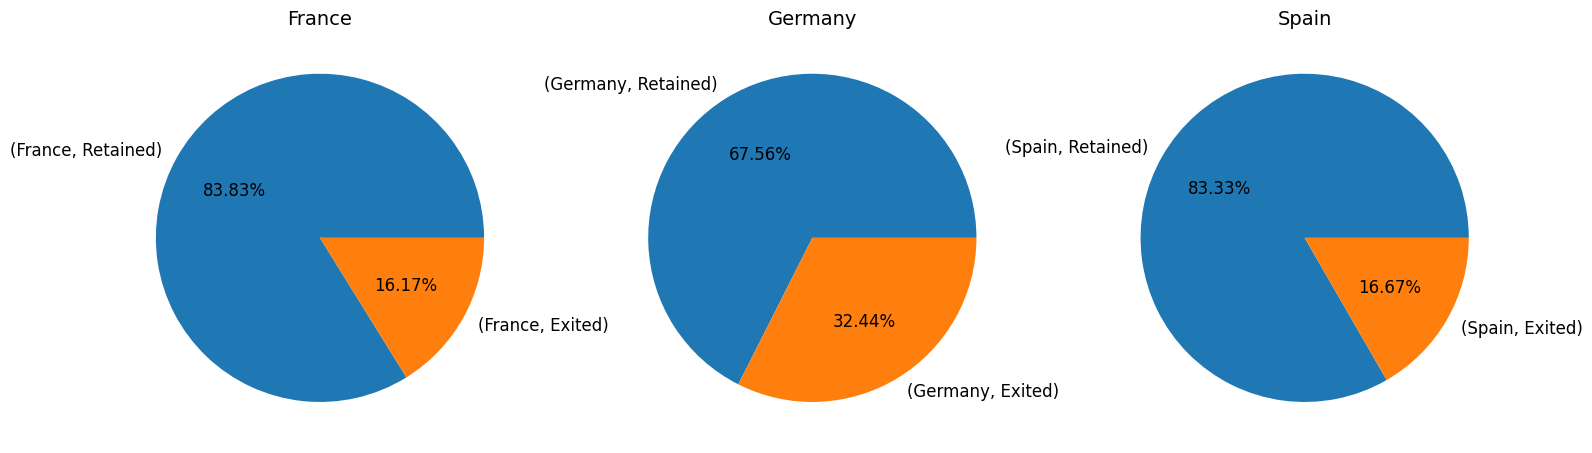

In [ ]:
plt.figure(figsize=(18,6))

index = 1

for i in [0,2,4]:
    plt.subplot(1,3,index)
    ctry[i:i+2].plot.pie(
        subplots=True,
        autopct='%.2f%%',
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(ctry.index[i][0], fontdict={'fontsize':14})

    plt.ylabel('') 

    index+=1


# gender

In [41]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [82]:
df.groupby('exited').gender.value_counts()

exited    gender
Exited    Female    1139
          Male       899
Retained  Male      4558
          Female    3404
Name: count, dtype: int64

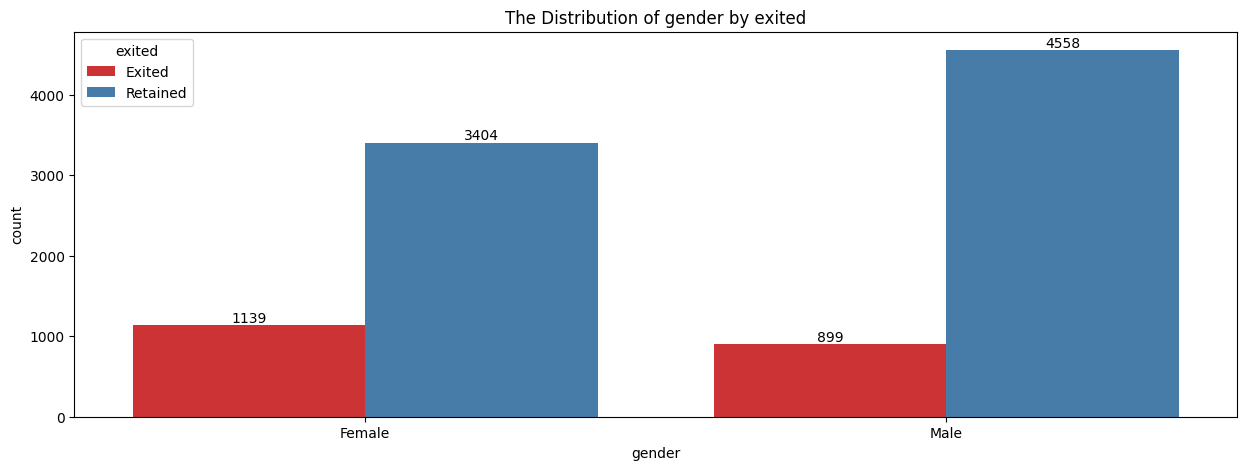

In [43]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data=df,x='gender',hue='exited',palette='Set1')

plt.title('The Distribution of gender by exited')

for container in ax.containers:
    ax.bar_label(container)

In [120]:
gender = df.groupby('exited').gender.value_counts(normalize=True, sort=False)

In [121]:
gender

exited    gender
Exited    Female    0.558881
          Male      0.441119
Retained  Female    0.427531
          Male      0.572469
Name: proportion, dtype: float64

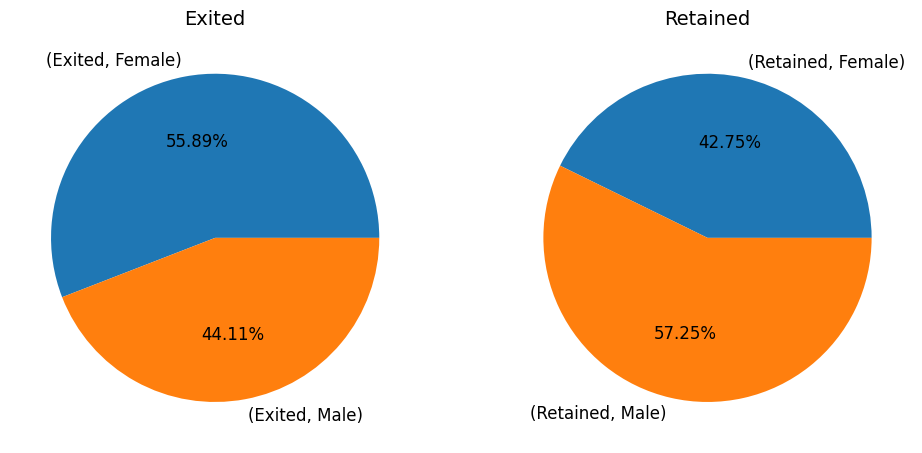

In [122]:
plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,3,index)
    gender[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(gender.index[i][0], fontdict={'fontsize':14})
    plt.ylabel('') 

    index+=1


# age

In [46]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [90]:
df.groupby("exited").age.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,44.835623,9.759754,18.0,38.0,45.0,51.0,84.0
Retained,7962.0,37.408063,10.125957,18.0,31.0,36.0,41.0,92.0


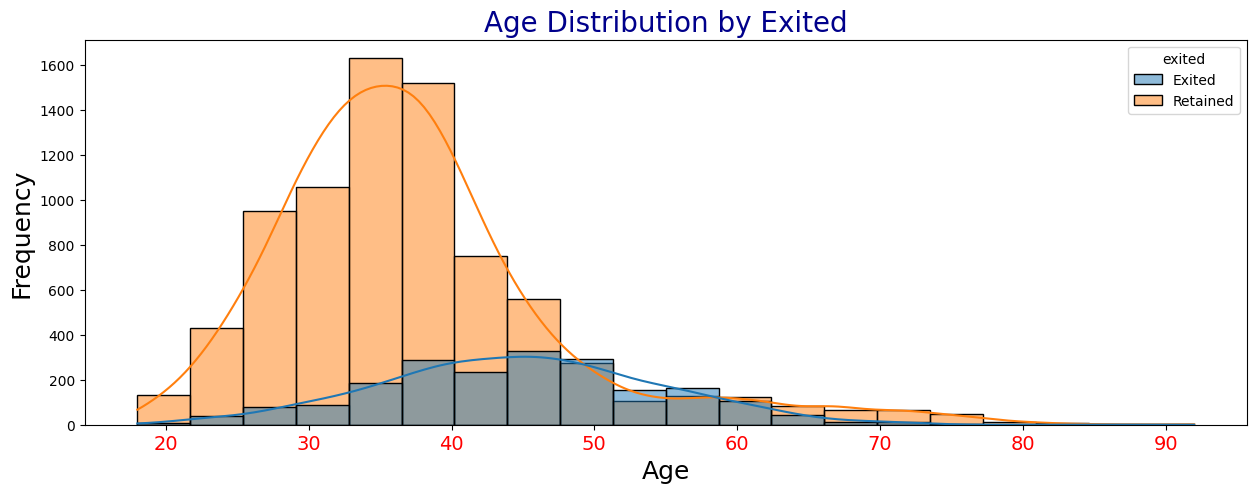

In [47]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="age",
             bins=20,
             kde=True,
             hue="exited")

plt.title("Age Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Age", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

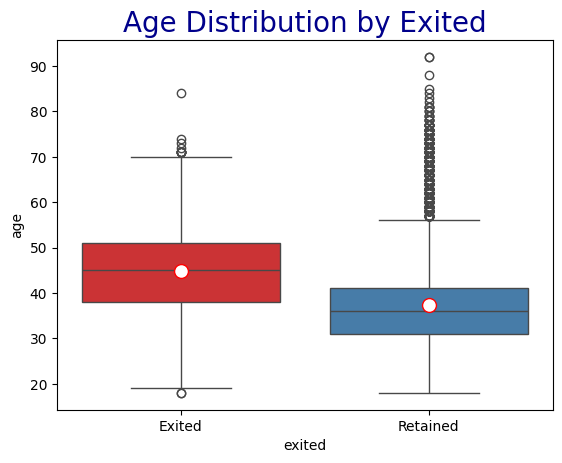

In [48]:
sns.boxplot(data=df,
            x="exited",
            y="age",
            showmeans=True,
            palette='Set1',
            hue='exited',
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"red",
                       "markersize":"10"})

plt.title("Age Distribution by Exited", fontsize=20, color="darkblue");

# tenure

In [49]:
df['tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

In [50]:
df['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [149]:
df.groupby('exited').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,4.934740,2.936768,0.0,2.0,5.0,8.0,10.0
Retained,7962.0,5.032781,2.880496,0.0,3.0,5.0,7.0,10.0


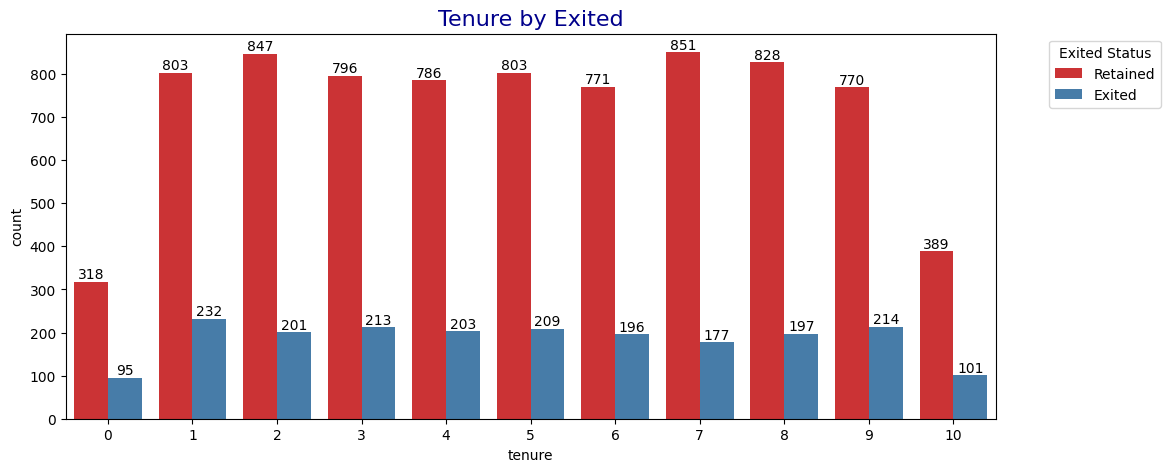

In [51]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="tenure", hue='exited', palette='Set1')

plt.title("Tenure by Exited", fontsize=16, color="darkblue")

ax.legend(
    title='Exited Status', 
    # This specifies the bounding box location for the legend
    # (x, y, width, height) in axes coordinates.
    # (1.05, 1) means 5% to the right of the right edge and at the top edge.
    bbox_to_anchor=(1.05, 1), 
    # 'upper left' places the upper-left corner of the legend box 
    # at the bbox_to_anchor coordinates.
    loc='upper left' 
)

for container in ax.containers:
    ax.bar_label(container);

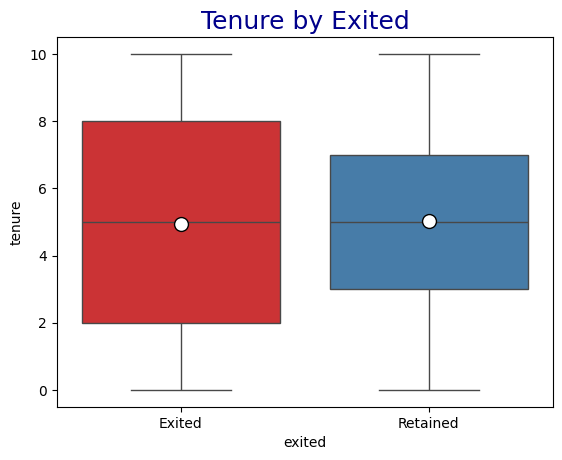

In [52]:
sns.boxplot(data=df,
            x="exited",
            y="tenure",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Tenure by Exited", fontsize=18, color='darkblue')

plt.show();

# balance

In [76]:
df['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [150]:
df.groupby('exited').balance.describe()

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
Exited,2038.0,91109.476006,58346.483197,0.0,38591.2225,109344.23,131423.6375,250898.09
Retained,7962.0,72742.750663,62851.577108,0.0,0.0000,92063.06,126419.3300,221532.80


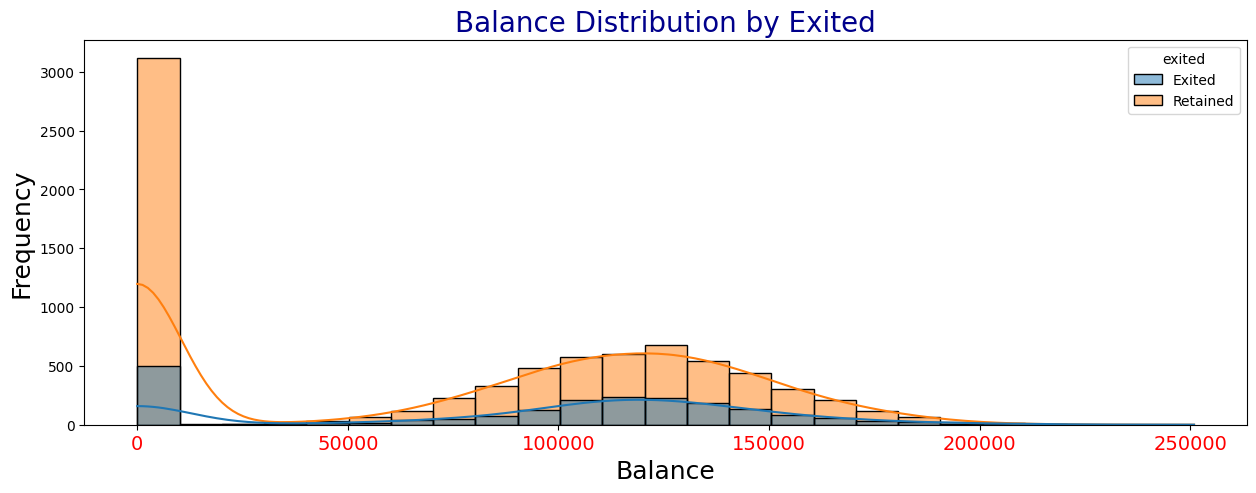

In [54]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="balance",
             bins=25,
             kde=True,
             hue="exited")

plt.title("Balance Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Balance", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

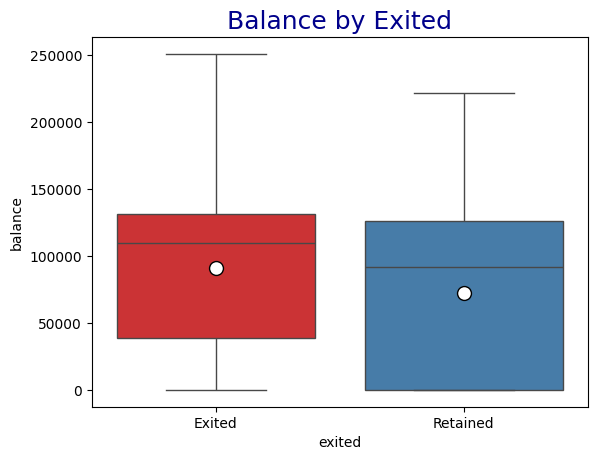

In [91]:
sns.boxplot(data=df,
            x="exited",
            y="balance",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Balance by Exited", fontsize=18, color='darkblue')

plt.show();

# num_of_products

In [55]:
df['num_of_products'].value_counts()

num_of_products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [56]:
df.groupby('exited').num_of_products.value_counts()

exited    num_of_products
Exited    1                  1409
          2                   349
          3                   220
          4                    60
Retained  2                  4241
          1                  3675
          3                    46
Name: count, dtype: int64

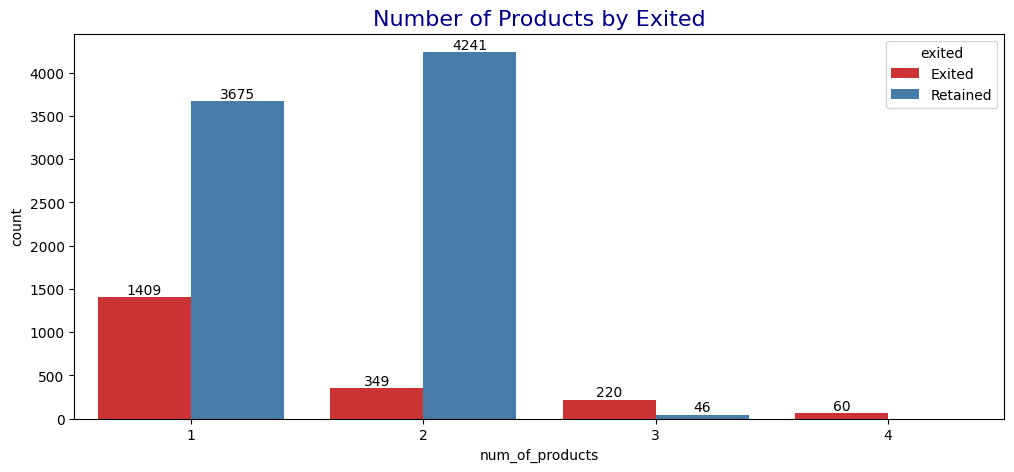

In [57]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="num_of_products", hue='exited', palette='Set1')

plt.title("Number of Products by Exited", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

# has_credit_card

In [58]:
df['has_credit_card'].value_counts()

has_credit_card
1    7055
0    2945
Name: count, dtype: int64

In [59]:
has_cr_card = df.groupby('exited').has_credit_card.value_counts(normalize=True)

In [60]:
has_cr_card

exited    has_credit_card
Exited    1                  0.699215
          0                  0.300785
Retained  1                  0.707109
          0                  0.292891
Name: proportion, dtype: float64

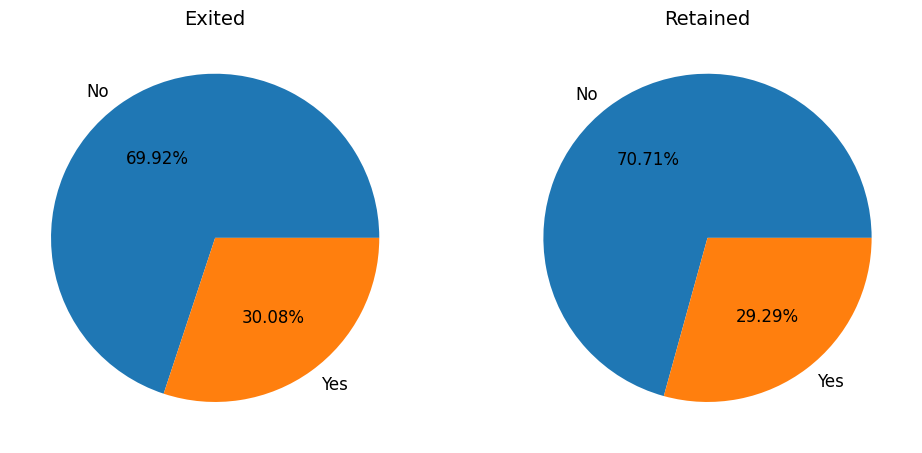

In [61]:
# The labels corresponding to the likely index values [0, 1]
pie_labels = ['No', 'Yes']

plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,3,index)
    has_cr_card[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        labels=pie_labels,
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(has_cr_card.index[i][0], fontdict={'fontsize':14})
    
    plt.ylabel('') 

    index+=1

plt.show()

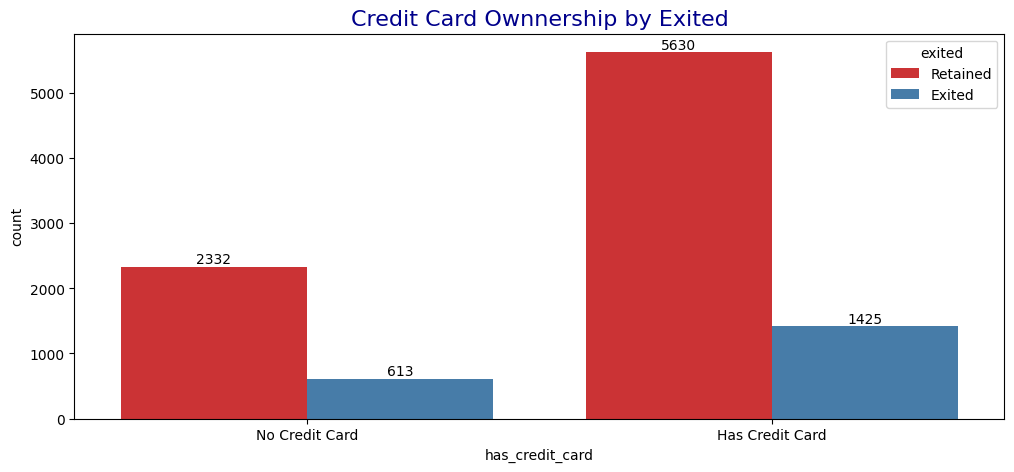

In [95]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="has_credit_card", hue='exited', palette='Set1')

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Credit Card', 'Has Credit Card'])

plt.title("Credit Card Ownnership by Exited", fontsize=16, color="darkblue")


for container in ax.containers:
    ax.bar_label(container);

# is_active

In [62]:
df['is_active'].value_counts()

is_active
1    5151
0    4849
Name: count, dtype: int64

In [117]:
isactive = df.groupby('exited').is_active.value_counts(normalize=True, sort=False)

In [118]:
isactive

exited    is_active
Exited    0            0.639352
          1            0.360648
Retained  0            0.445365
          1            0.554635
Name: proportion, dtype: float64

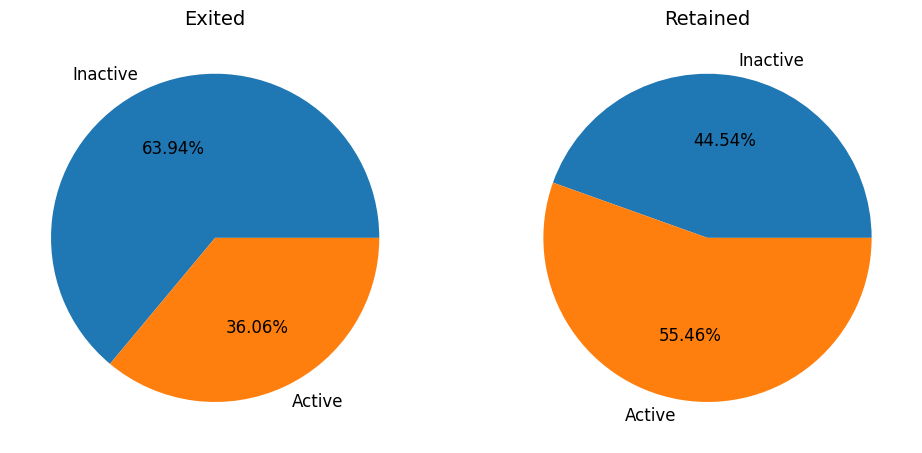

In [131]:
# The labels corresponding to the likely index values [0, 1]
pie_labels = ['Inactive', 'Active']

plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,3,index)
    isactive[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        labels=pie_labels,
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(isactive.index[i][0], fontdict={'fontsize':14})
    
    plt.ylabel('') 

    index+=1

plt.show()

# estimated_salary

In [73]:
df['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

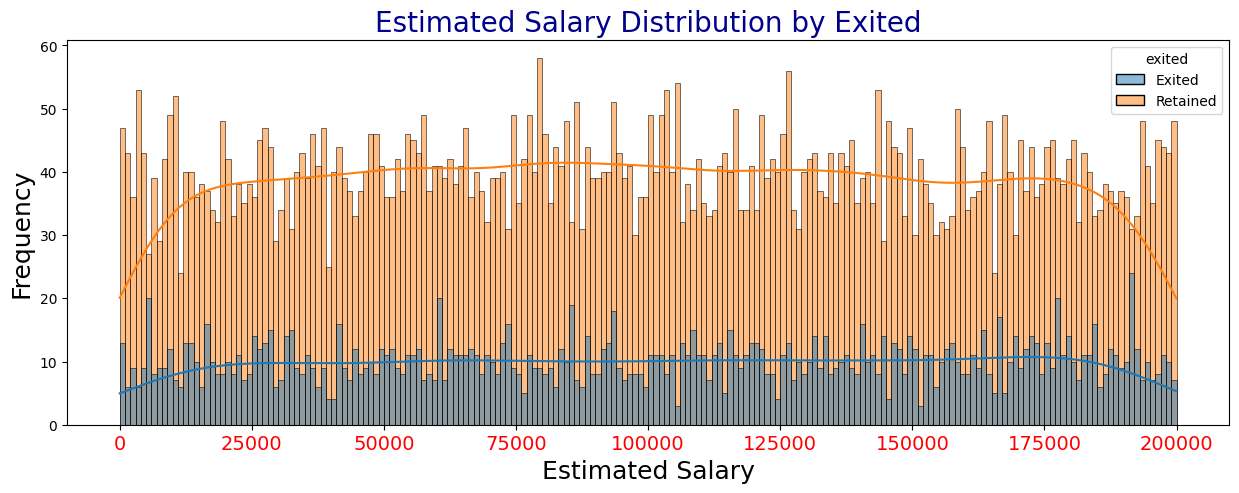

In [75]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="estimated_salary",
             bins=200,
             kde=True,
             hue="exited")

plt.title("Estimated Salary Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Estimated Salary", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

# complained

In [123]:
df['complained'].value_counts()

complained
0    7956
1    2044
Name: count, dtype: int64

In [126]:
cmplnd = df.groupby('exited').complained.value_counts(normalize=True, sort=False)

In [127]:
cmplnd

exited    complained
Exited    0             0.001963
          1             0.998037
Retained  0             0.998744
          1             0.001256
Name: proportion, dtype: float64

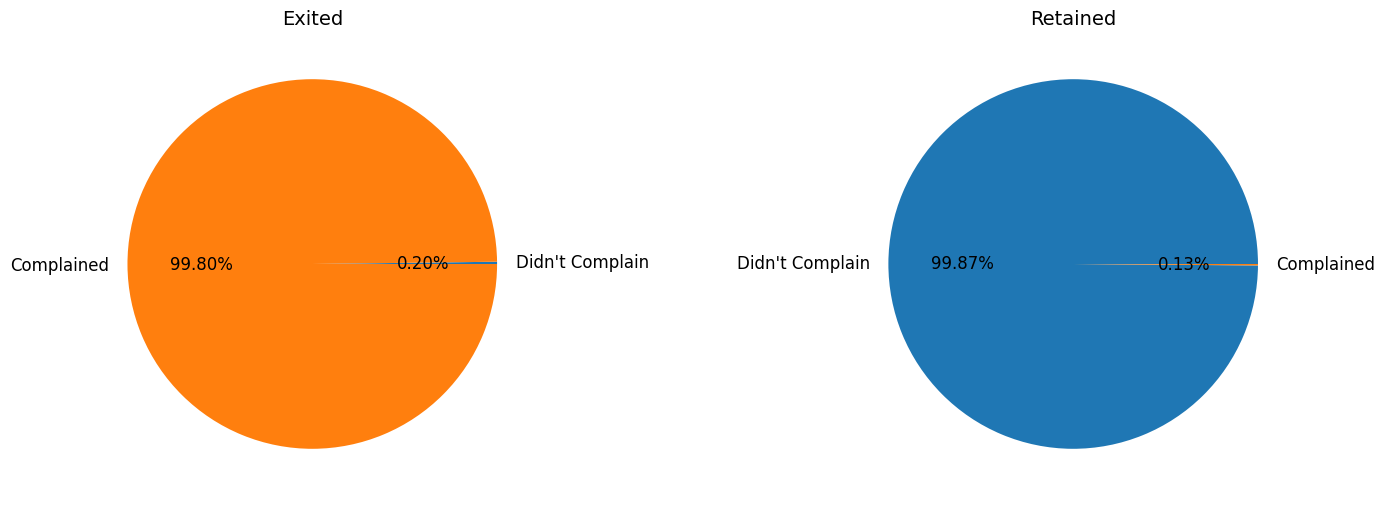

In [129]:
# The labels corresponding to the likely index values [0, 1]
pie_labels = ['Didn\'t Complain', 'Complained']

plt.figure(figsize=(18,6))

index = 1

for i in [0,2]:
    plt.subplot(1,2,index)
    cmplnd[i:i+2].plot.pie(
        subplots=True,
        autopct="%.2f%%",
        labels=pie_labels,
        textprops={
            'fontsize':12
        },
        color=['red','blue']
    )
    plt.title(cmplnd.index[i][0], fontdict={'fontsize':14})
    
    plt.ylabel('') 

    index+=1

plt.show()

# satisfaction_score

In [132]:
df['satisfaction_score'].describe()

count    10000.000000
mean         3.013800
std          1.405919
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: satisfaction_score, dtype: float64

In [155]:
df.groupby('exited')['satisfaction_score'].value_counts(normalize=True, sort=False)

exited    satisfaction_score
Exited    1                     0.189892
          2                     0.215407
          3                     0.196762
          4                     0.203140
          5                     0.194799
Retained  1                     0.194047
          2                     0.197815
          3                     0.206104
          4                     0.200201
          5                     0.201834
Name: proportion, dtype: float64

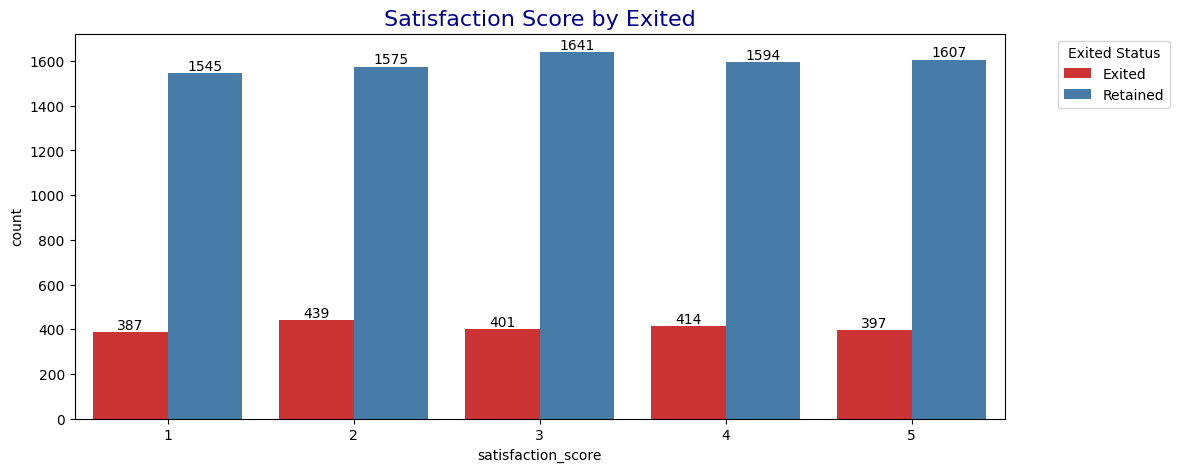

In [137]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="satisfaction_score", hue='exited', palette='Set1')

plt.title("Satisfaction Score by Exited", fontsize=16, color="darkblue")

ax.legend(
    title='Exited Status', 
    # This specifies the bounding box location for the legend
    # (x, y, width, height) in axes coordinates.
    # (1.05, 1) means 5% to the right of the right edge and at the top edge.
    bbox_to_anchor=(1.05, 1), 
    # 'upper left' places the upper-left corner of the legend box 
    # at the bbox_to_anchor coordinates.
    loc='upper left' 
)

for container in ax.containers:
    ax.bar_label(container);

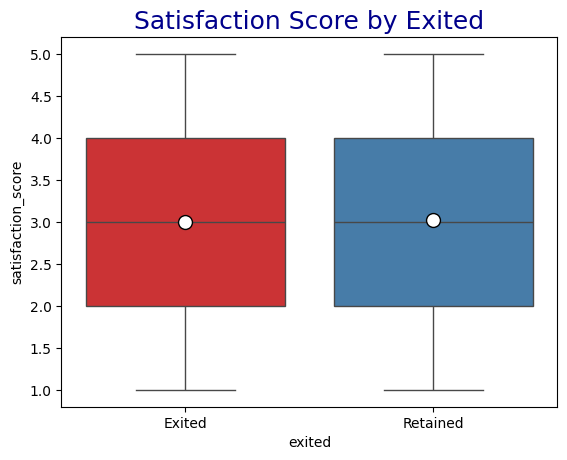

In [138]:
sns.boxplot(data=df,
            x="exited",
            y="satisfaction_score",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Satisfaction Score by Exited", fontsize=18, color='darkblue')

plt.show();

# card_type

In [139]:
df['card_type'].value_counts()

card_type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [141]:
df.groupby('exited').card_type.value_counts(normalize=True, sort=False)

exited    card_type
Exited    DIAMOND      0.267910
          GOLD         0.236506
          PLATINUM     0.249264
          SILVER       0.246320
Retained  DIAMOND      0.246295
          GOLD         0.253705
          PLATINUM     0.249560
          SILVER       0.250440
Name: proportion, dtype: float64

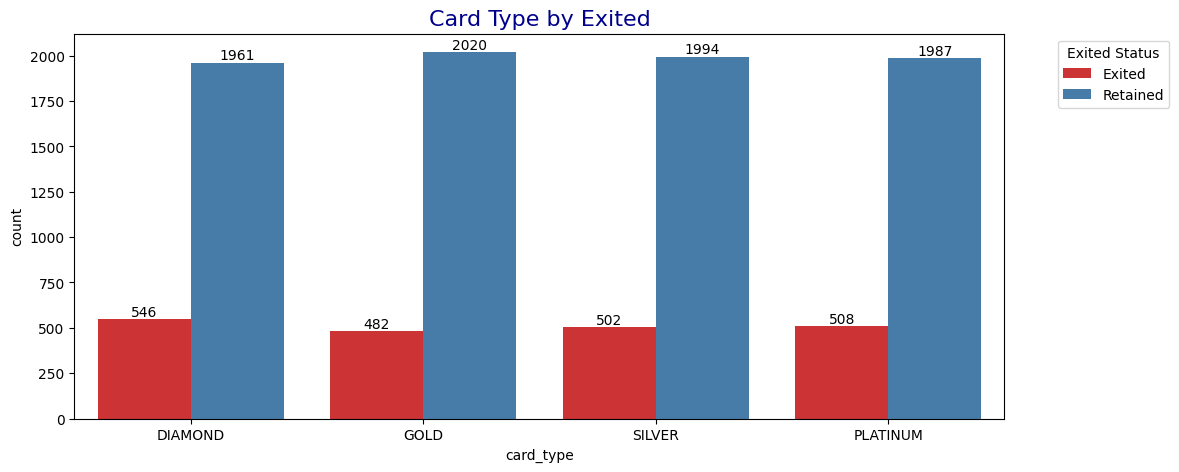

In [142]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, x="card_type", hue='exited', palette='Set1')

plt.title("Card Type by Exited", fontsize=16, color="darkblue")

ax.legend(
    title='Exited Status', 
    # This specifies the bounding box location for the legend
    # (x, y, width, height) in axes coordinates.
    # (1.05, 1) means 5% to the right of the right edge and at the top edge.
    bbox_to_anchor=(1.05, 1), 
    # 'upper left' places the upper-left corner of the legend box 
    # at the bbox_to_anchor coordinates.
    loc='upper left' 
)

for container in ax.containers:
    ax.bar_label(container);

# points_earned

In [143]:
df['points_earned'].describe()

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: points_earned, dtype: float64

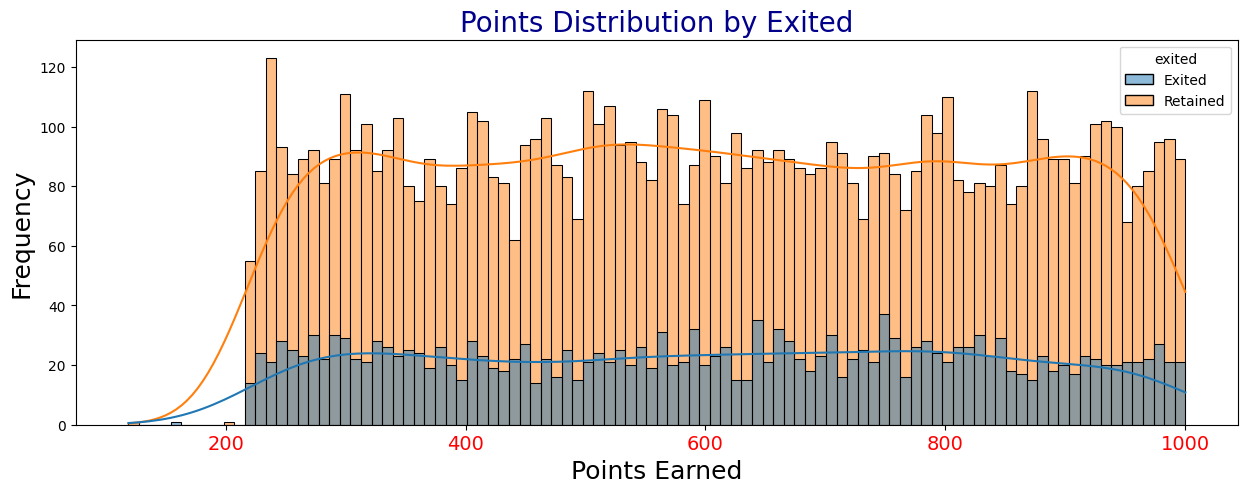

In [146]:
plt.figure(figsize=(15, 5))

sns.histplot(data=df,
             x="points_earned",
             bins=100,
             kde=True,
             hue="exited")

plt.title("Points Distribution by Exited", fontsize=20, color="darkblue")
plt.xlabel("Points Earned", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14, color='red')

plt.show();

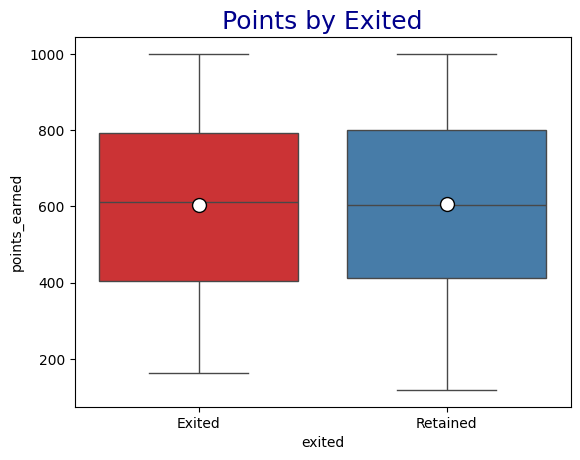

In [147]:
sns.boxplot(data=df,
            x="exited",
            y="points_earned",
            palette='Set1',
            hue='exited',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                       "markersize":"10"})


plt.title("Points by Exited", fontsize=18, color='darkblue')

plt.show();

---

## Feature Engineering

In [65]:
# cols_to_drop = ['row_num','customer_id','surname']

In [66]:
# df = df.drop(cols_to_drop, axis=1)

In [67]:
df.head()

,credit_score,country,gender,age,tenure,balance,num_of_products,has_credit_card,is_active,estimated_salary,complained,satisfaction_score,card_type,points_earned,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,Retained
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Exited
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,Retained
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,Retained
